In [1]:
import sys
import gpytorch
import numpy as np
import pandas as pd
import torch
from datetime import datetime
from scipy.stats import qmc

from bo_methods_lib.GP_Vs_True import Compare_GP_True
# from bo_methods_lib.GP_Validation import LOO_Analysis
from bo_methods_lib.bo_functions_generic import gen_theta_set, find_train_doc_path, set_ep, clean_1D_arrays

import matplotlib as mpl

import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
# DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M")
# DateTime = "2022/11/29/09-48"
DateTime = None ##For Testing

#Set Parameters
#Need to run at a and b, need 2 arrays to test that this will work
CS = 2.2

Constants = np.array([[-200,-100,-170,15],
                      [-1,-1,-6.5,0.7],
                      [0,0,11,0.6],
                      [-10,-10,-6.5,0.7],
                      [1,0,-0.5,-1],
                      [0,0.5,1.5,1]])
if CS == 2.2:
    skip_param_types = 1 #This is what changes for subpoint
    true_p = Constants[skip_param_types:skip_param_types+2].flatten()
    param_dict = {0 : 'a_1', 1 : 'a_2', 2 : 'a_3', 3 : 'a_4',
                  4 : 'b_1', 5 : 'b_2', 6 : 'b_3', 7 : 'b_4'}
    exp_d = 2
    n = 27 #Number of experimental data points to use
    bounds_x = np.array([[-1.5, -0.5],
                     [   1,    2]])
    bounds_p = np.array([[-2, -2, -10, -2, -2, -2,  5, -2],
                   [ 2,  2,   0,  2,  2,  2, 15,  2]])

else:
    Constants = true_p = np.array([1,-1])
    skip_param_types = 0
    param_dict = {0 : '\\theta_1', 1 : '\\theta_2'}
    exp_d = 1
    n = 5
    bounds_x = np.array([[-2], [2]])
    bounds_p = np.array([[-2, -2],
                         [ 2,  2]])

# print(Theta_True)
t = 40
d = len(true_p)
train_iter = 300
noise_std = 0.1
set_lengthscale = None
verbose = False
norm = False

obj = "obj"

emulator =  True
save_figure = True
save_figure = False

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/d='+str(exp_d)+'/n='+str(n)+'.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1:exp_d+1]
Yexp = exp_data[:,-1]

Xexp = clean_1D_arrays(Xexp)

#Define GP Testing space
p=10
X_space = gen_theta_set(LHS = False, n_points = p, dimensions = 2, bounds = bounds_x)

Date and Time:  22-Feb-2023 (10:13:18)


Date and Time:  22-Feb-2023 (10:13:18)
Date and Time Saved:  None


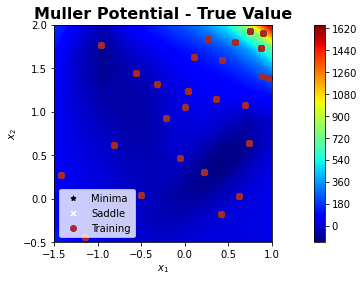

NameError: name 'title2' is not defined

In [3]:
%%time
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
# DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M")
DateTime = None ##For Testing
print("Date and Time Saved: ", DateTime)
save_figure = False

t_use = int(t*n)
all_data_doc = find_train_doc_path(emulator, obj, d, t_use)
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))

Compare_GP_True(all_data, X_space, Xexp, Yexp, Constants, true_p, obj, CS, 
                skip_param_types, set_lengthscale, train_iter, noise_std, verbose, DateTime, save_figure)